In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv("/content/traffic_accidents (1).csv")
data.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [8]:
data.shape

(209306, 24)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [11]:
# List of categorical columns
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

# Display unique value counts for each categorical column
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())
    print("-" * 50)



Column: crash_date
crash_date
12/29/2020 05:00:00 PM    10
02/17/2022 03:30:00 PM     8
12/29/2020 05:30:00 PM     6
06/17/2019 04:30:00 PM     6
11/26/2018 08:30:00 AM     6
                          ..
03/30/2018 11:15:00 PM     1
04/09/2018 01:15:00 PM     1
01/18/2020 06:30:00 AM     1
06/05/2019 07:49:00 PM     1
10/25/2023 06:10:00 PM     1
Name: count, Length: 189087, dtype: int64
--------------------------------------------------

Column: traffic_control_device
traffic_control_device
TRAFFIC SIGNAL              123944
STOP SIGN/FLASHER            49139
NO CONTROLS                  29508
UNKNOWN                       4455
OTHER                          670
YIELD                          468
PEDESTRIAN CROSSING SIGN       247
OTHER REG. SIGN                181
LANE USE MARKING               153
FLASHING CONTROL SIGNAL        150
POLICE/FLAGMAN                 104
OTHER WARNING SIGN              95
RAILROAD CROSSING GATE          78
SCHOOL ZONE                     33
OTHER RAILRO

           num_units  injuries_total  injuries_fatal  injuries_incapacitating  \
count  209306.000000   209306.000000   209306.000000            209306.000000   
mean        2.063300        0.382717        0.001859                 0.038102   
std         0.396012        0.799720        0.047502                 0.233964   
min         1.000000        0.000000        0.000000                 0.000000   
25%         2.000000        0.000000        0.000000                 0.000000   
50%         2.000000        0.000000        0.000000                 0.000000   
75%         2.000000        1.000000        0.000000                 0.000000   
max        11.000000       21.000000        3.000000                 7.000000   

       injuries_non_incapacitating  injuries_reported_not_evident  \
count                209306.000000                  209306.000000   
mean                      0.221241                       0.121516   
std                       0.614960                       0.4508

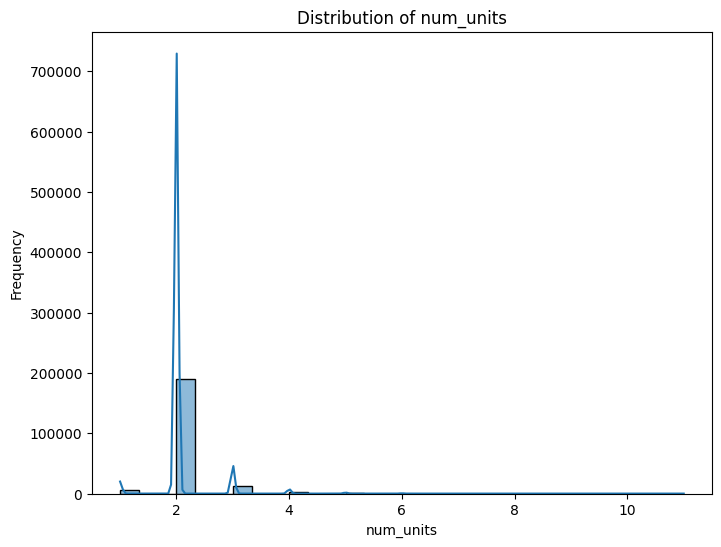

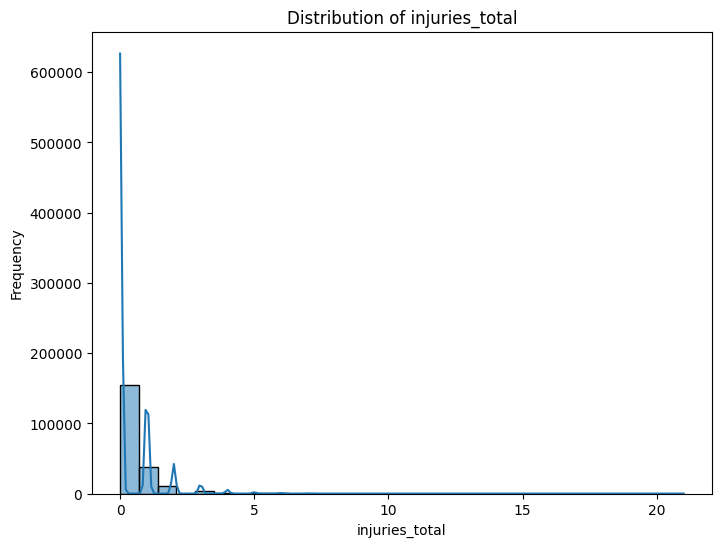

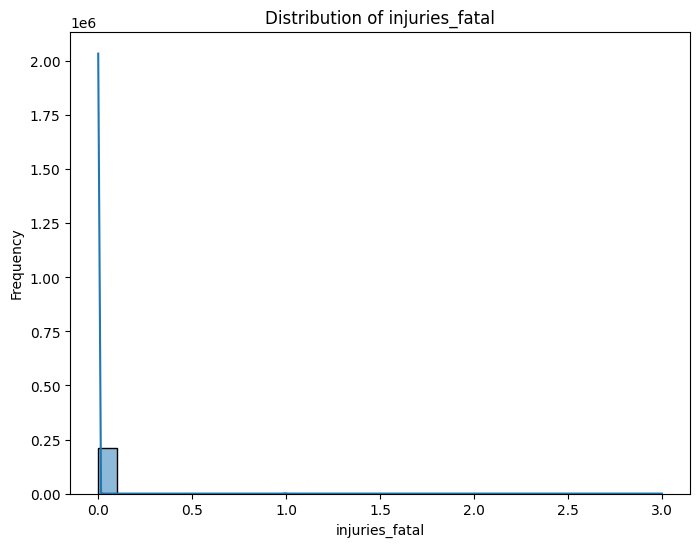

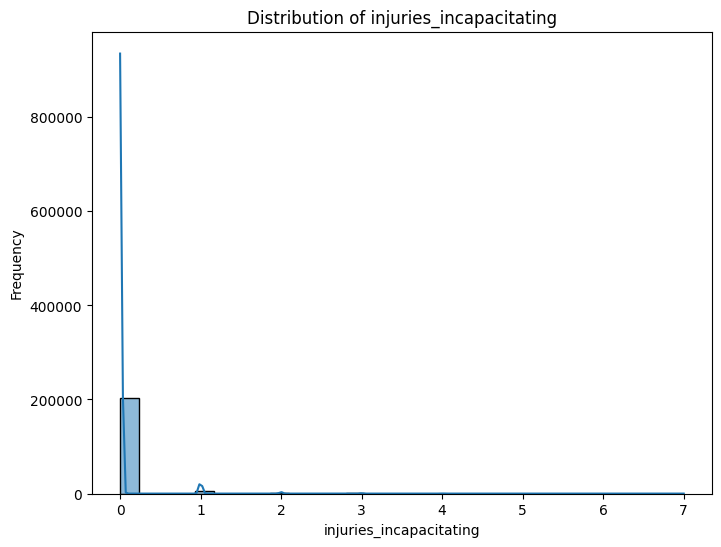

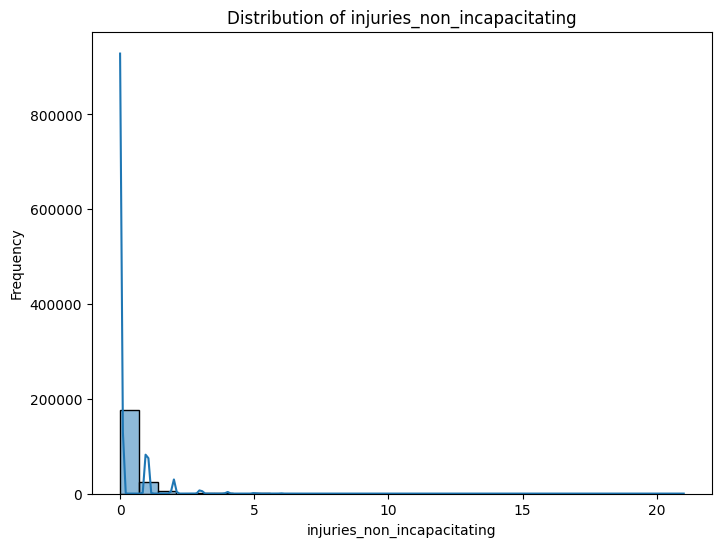

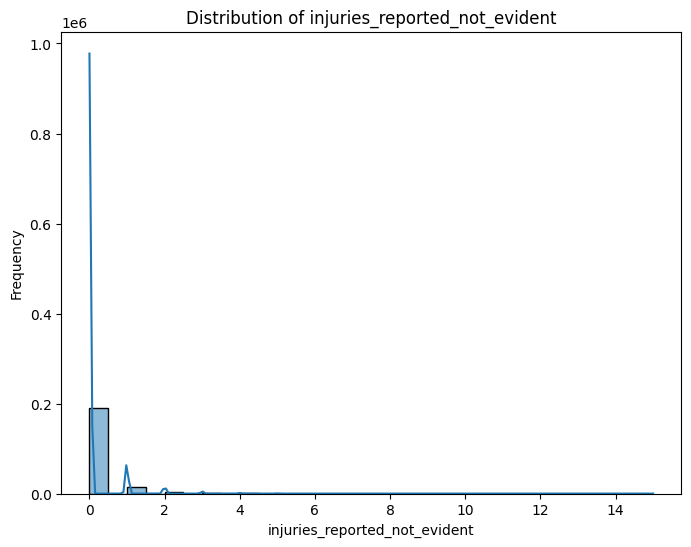

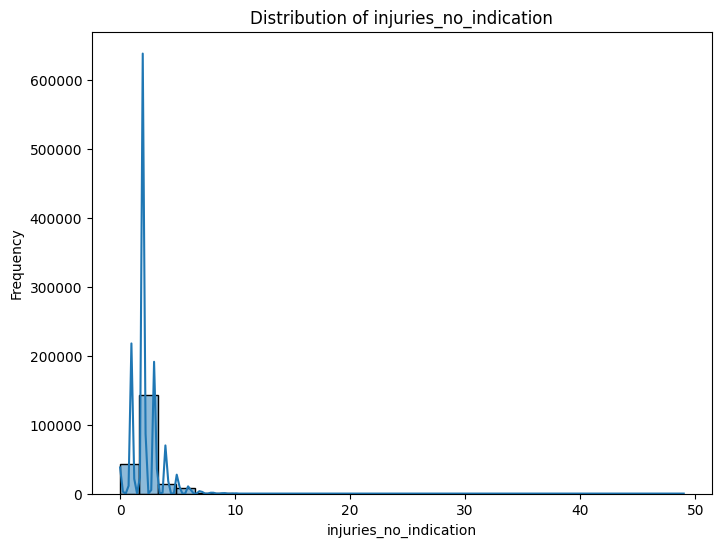

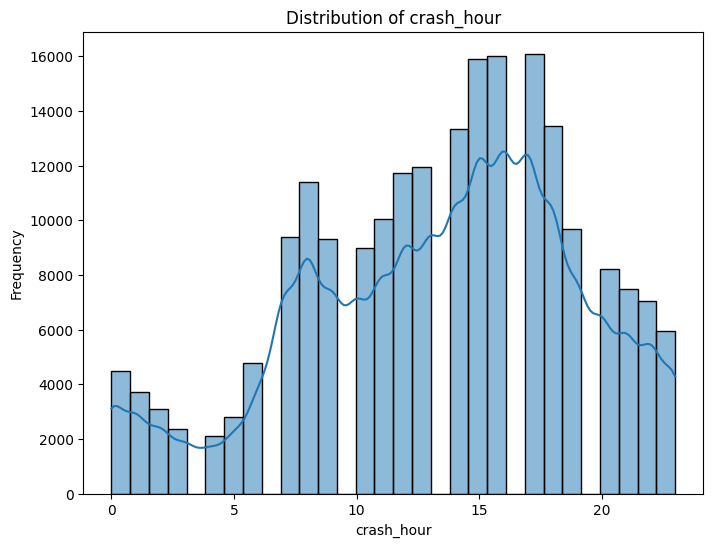

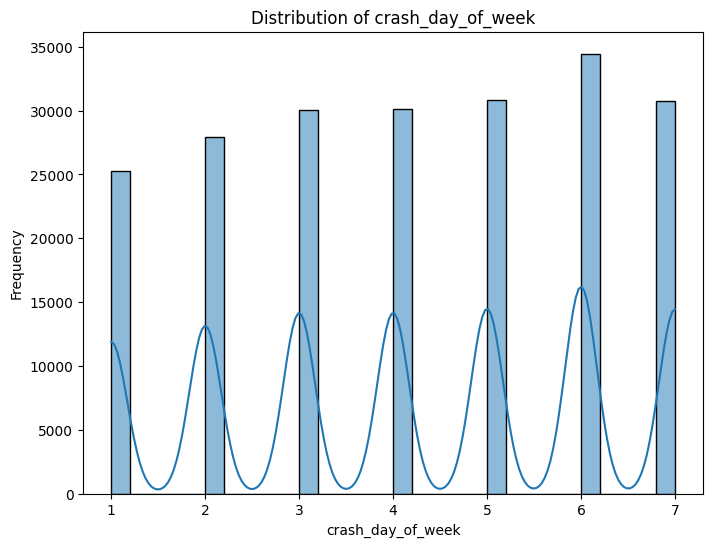

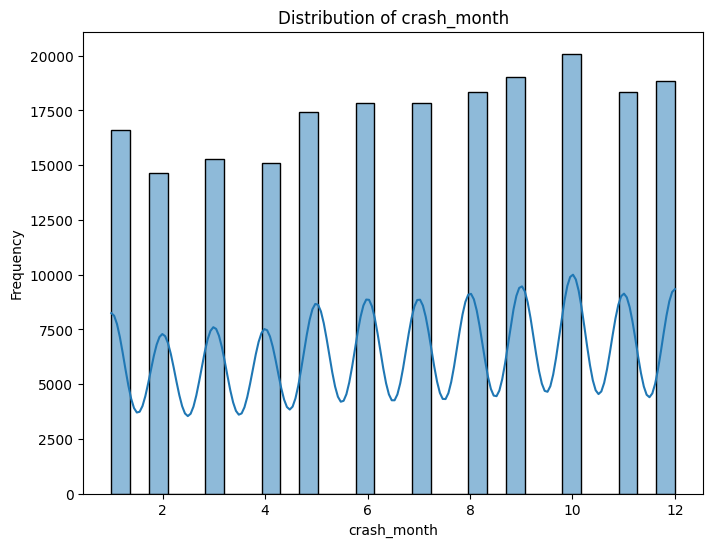

In [14]:
# List of numerical columns
numerical_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

# Summary statistics
print(data[numerical_cols].describe())

# Plot distributions
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



**COrrelation Matrix**

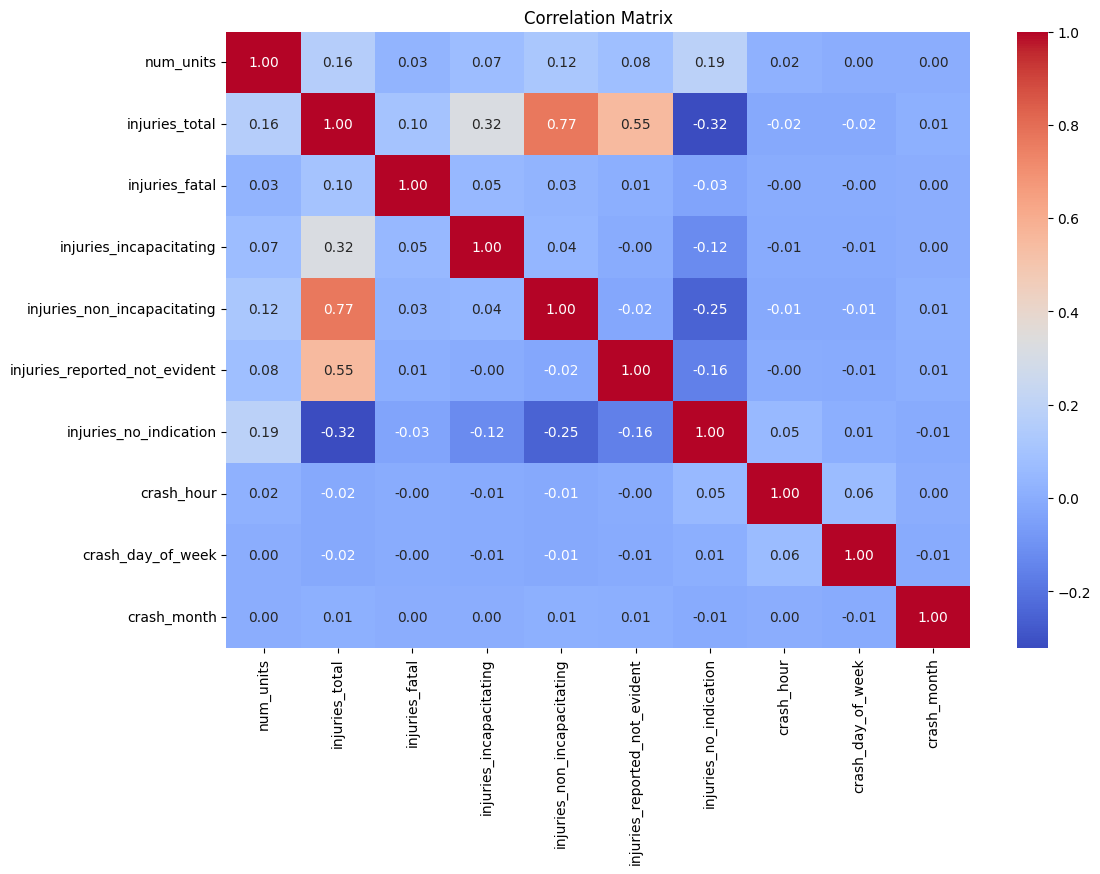

In [17]:
# Compute the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Time Based Analysis**

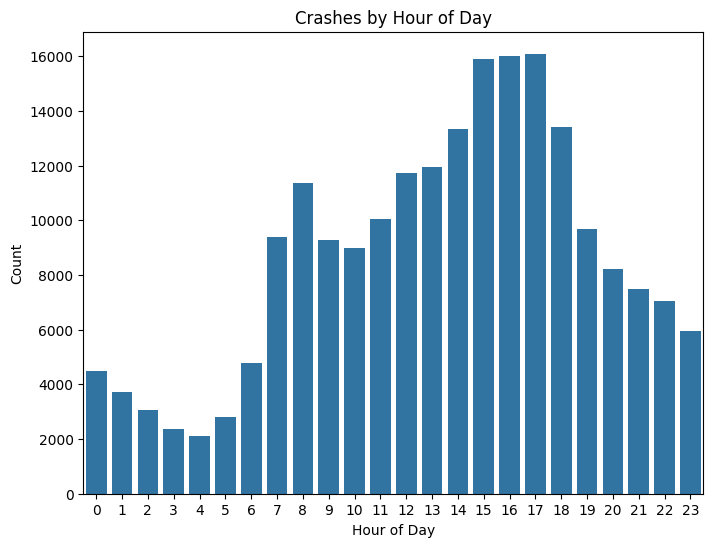

In [18]:
# Crash hour analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='crash_hour', order=range(24))
plt.title('Crashes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

Most Accidents Occurs During 2pm to 6pm

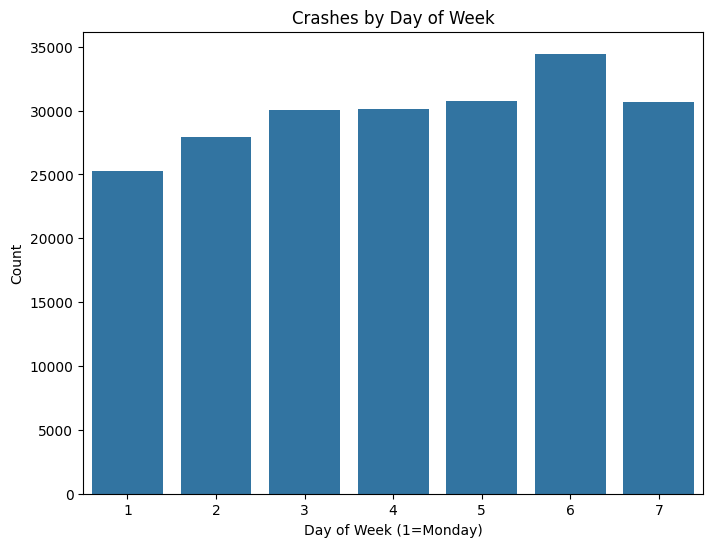

In [19]:
# Crashes by day of the week
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='crash_day_of_week', order=range(1, 8))
plt.title('Crashes by Day of Week')
plt.xlabel('Day of Week (1=Monday)')
plt.ylabel('Count')
plt.show()


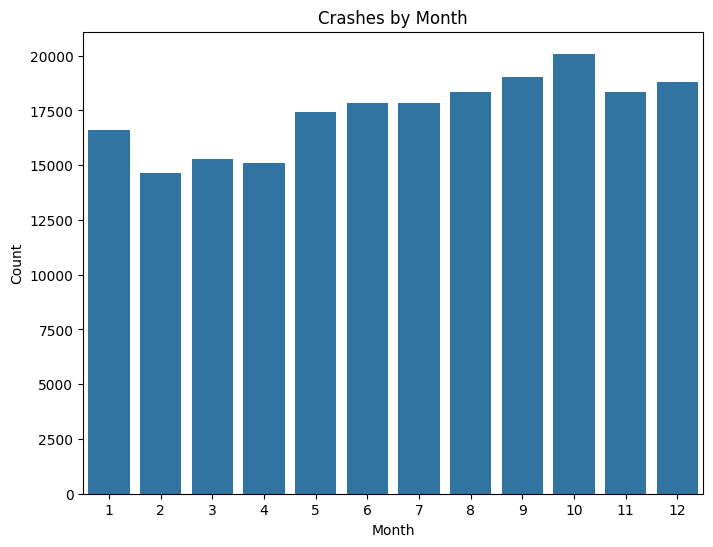

In [20]:
# Crashes by month
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='crash_month', order=range(1, 13))
plt.title('Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

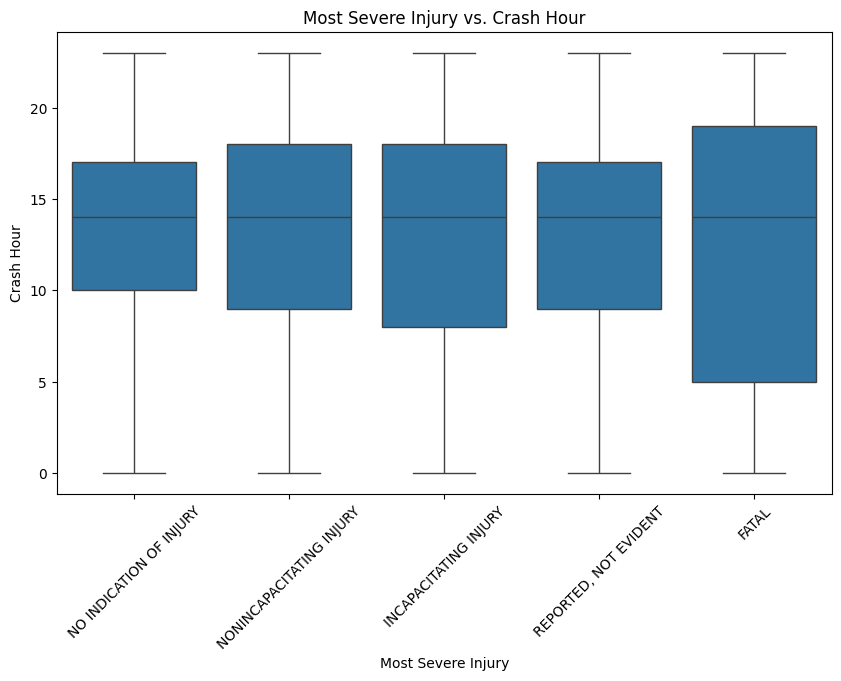

In [21]:
# Severity of injury vs. crash hour
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='most_severe_injury', y='crash_hour')
plt.title('Most Severe Injury vs. Crash Hour')
plt.xlabel('Most Severe Injury')
plt.ylabel('Crash Hour')
plt.xticks(rotation=45)
plt.show()


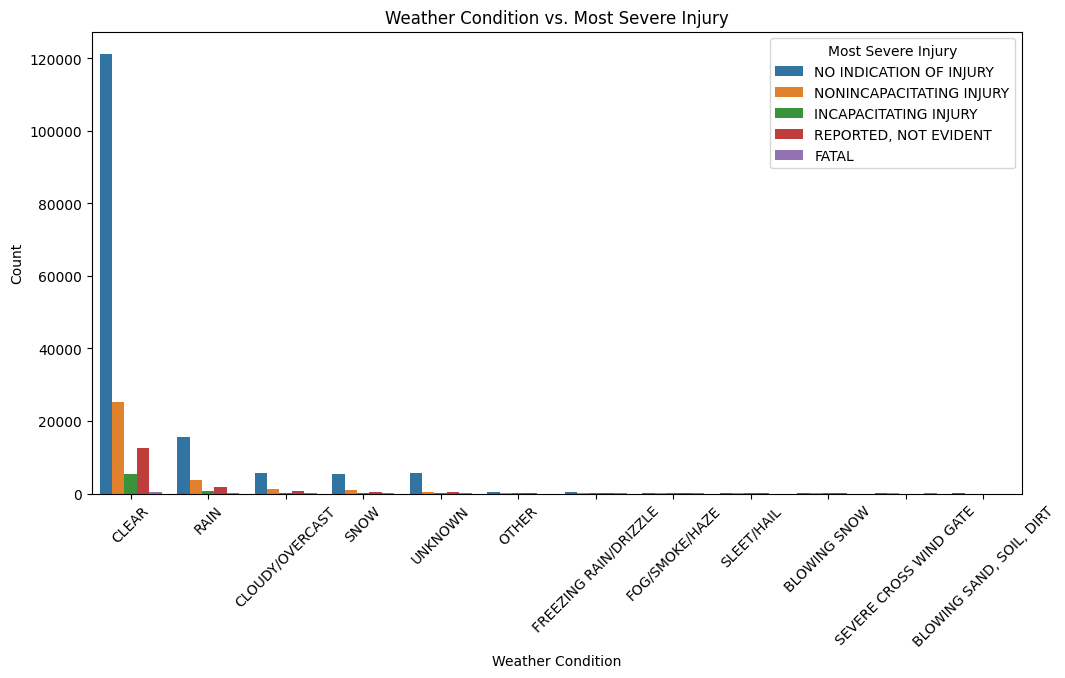

In [22]:
# Weather condition vs. severity of injury
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='weather_condition', hue='most_severe_injury', order=data['weather_condition'].value_counts().index)
plt.title('Weather Condition vs. Most Severe Injury')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Most Severe Injury', bbox_to_anchor=(1, 1))
plt.show()

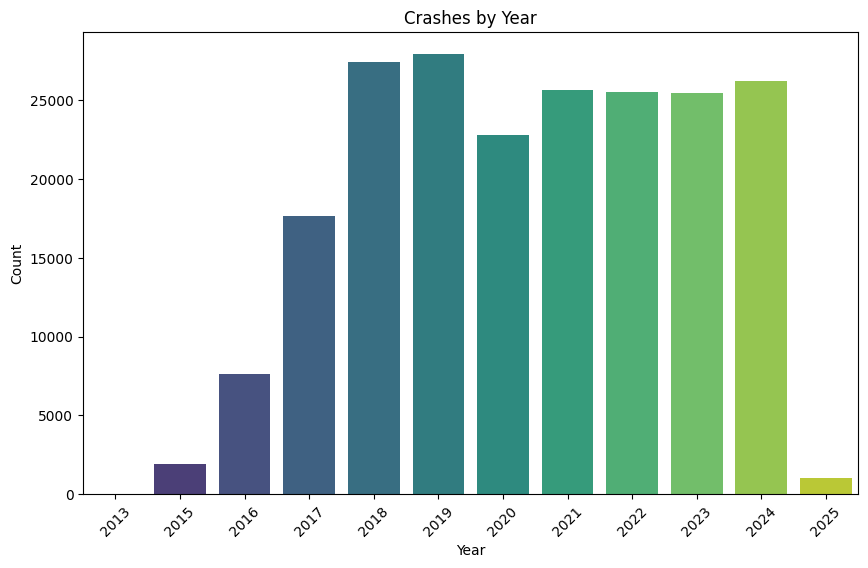

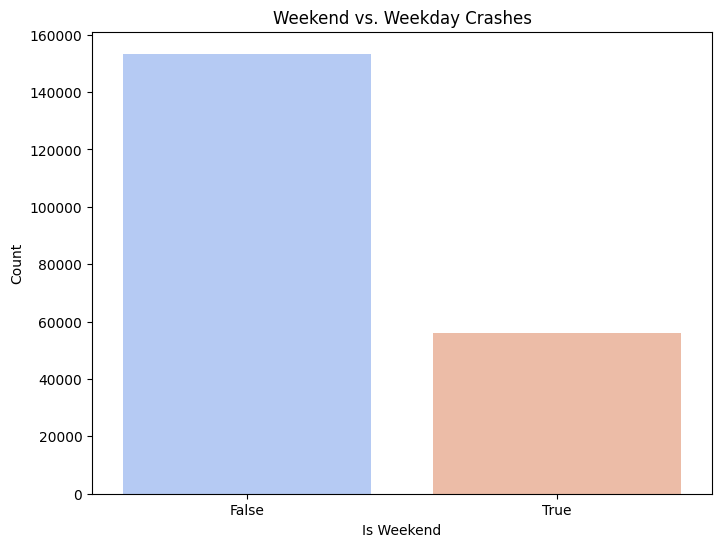

In [24]:
# Convert crash_date to datetime
data['crash_date'] = pd.to_datetime(data['crash_date'])

# Extract year, month, and weekday
data['crash_year'] = data['crash_date'].dt.year
data['crash_weekday'] = data['crash_date'].dt.day_name()
data['is_weekend'] = data['crash_weekday'].isin(['Saturday', 'Sunday'])

# Plot crashes by year
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='crash_year', palette='viridis')
plt.title('Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Weekend vs. Weekday Crashes
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='is_weekend', palette='coolwarm')
plt.title('Weekend vs. Weekday Crashes')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.show()

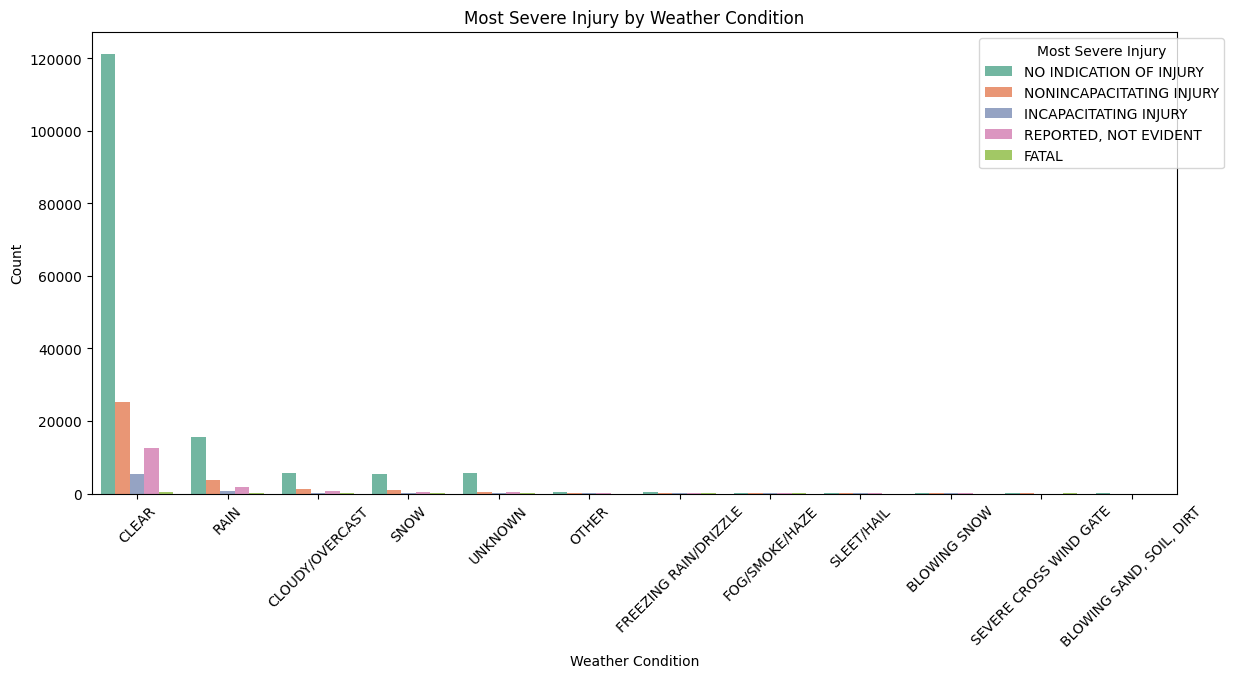

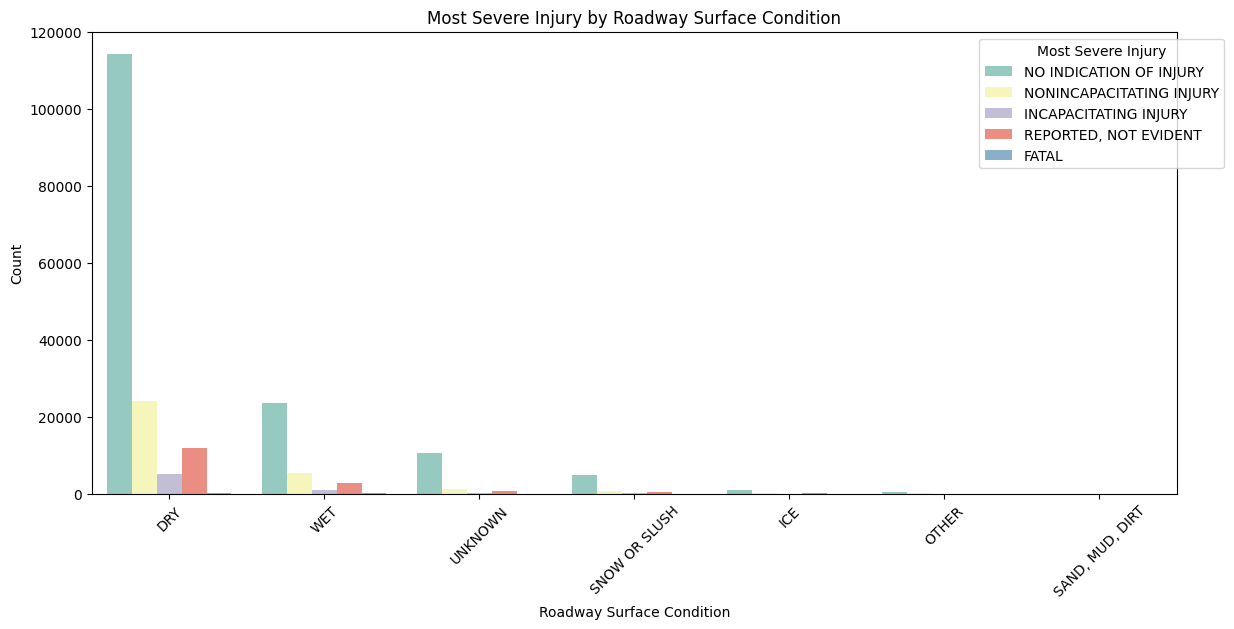

In [25]:
# Most severe injuries by weather condition
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='weather_condition', hue='most_severe_injury', order=data['weather_condition'].value_counts().index, palette='Set2')
plt.title('Most Severe Injury by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Most Severe Injury', bbox_to_anchor=(1.05, 1))
plt.show()

# Most severe injuries by roadway surface condition
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='roadway_surface_cond', hue='most_severe_injury', order=data['roadway_surface_cond'].value_counts().index, palette='Set3')
plt.title('Most Severe Injury by Roadway Surface Condition')
plt.xlabel('Roadway Surface Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Most Severe Injury', bbox_to_anchor=(1.05, 1))
plt.show()

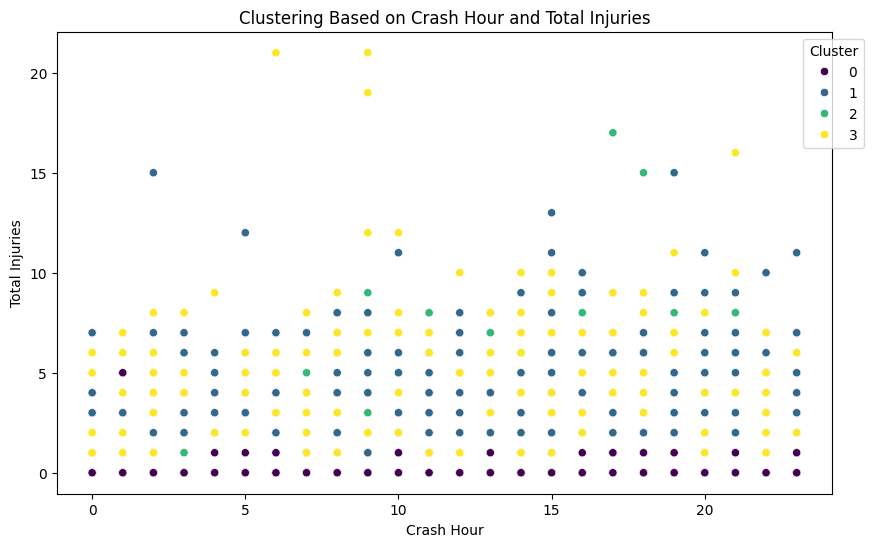

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = data[numerical_cols]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='crash_hour', y='injuries_total', hue='cluster', palette='viridis')
plt.title('Clustering Based on Crash Hour and Total Injuries')
plt.xlabel('Crash Hour')
plt.ylabel('Total Injuries')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1))
plt.show()

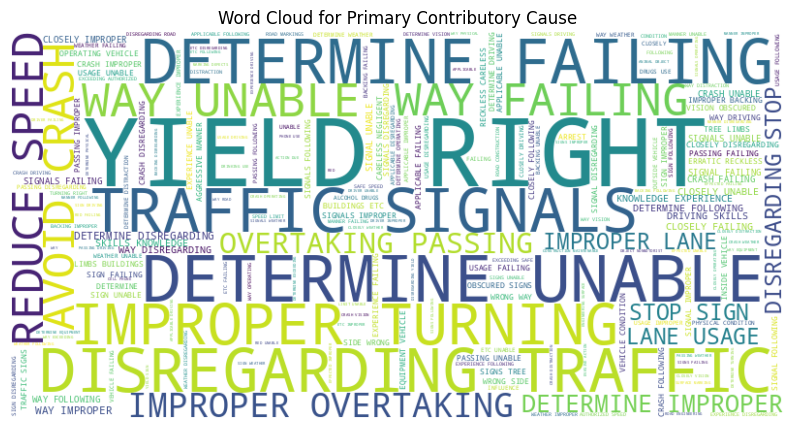

In [29]:
from wordcloud import WordCloud

# Generate a word cloud for contributory causes
text = " ".join(cause for cause in data['prim_contributory_cause'])
wordcloud = WordCloud(background_color='white', colormap='viridis', width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Primary Contributory Cause')
plt.show()

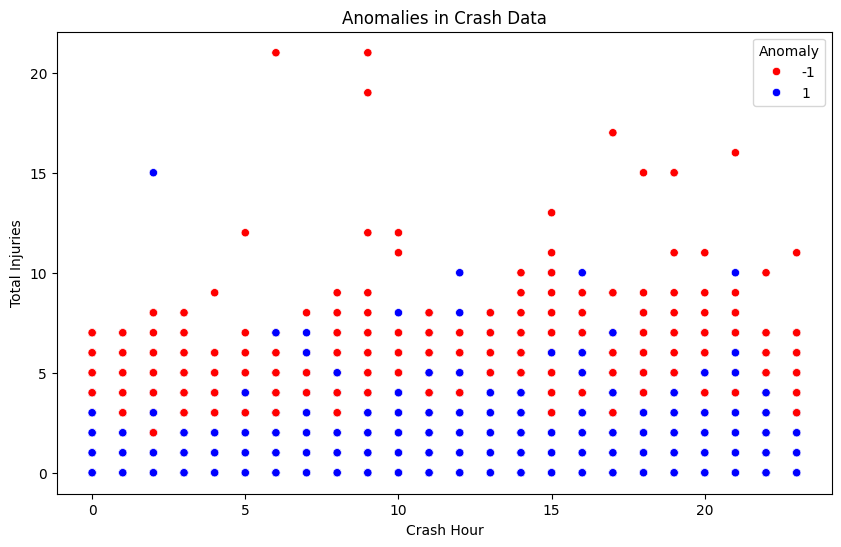

In [30]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = iso_forest.fit_predict(scaled_features)

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='crash_hour', y='injuries_total', hue='anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Anomalies in Crash Data')
plt.xlabel('Crash Hour')
plt.ylabel('Total Injuries')
plt.legend(title='Anomaly', loc='upper right')
plt.show()

In [31]:
# Define the target and features
target = 'most_severe_injury'
features = ['traffic_control_device', 'weather_condition', 'lighting_condition',
            'first_crash_type', 'trafficway_type', 'alignment',
            'roadway_surface_cond', 'road_defect', 'crash_type',
            'intersection_related_i', 'damage', 'prim_contributory_cause',
            'num_units', 'crash_hour', 'crash_day_of_week', 'crash_month']

# Encode categorical features
data_encoded = pd.get_dummies(data[features], drop_first=True)

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target_encoded'] = le.fit_transform(data[target])

In [32]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X = data_encoded
y = data['target_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

Accuracy: 0.77

Classification Report:

                          precision    recall  f1-score   support

                   FATAL       0.00      0.00      0.00        70
   INCAPACITATING INJURY       0.13      0.03      0.05      1313
 NO INDICATION OF INJURY       0.84      0.94      0.89     30958
NONINCAPACITATING INJURY       0.46      0.41      0.44      6306
   REPORTED, NOT EVIDENT       0.28      0.13      0.18      3215

                accuracy                           0.77     41862
               macro avg       0.34      0.30      0.31     41862
            weighted avg       0.72      0.77      0.74     41862



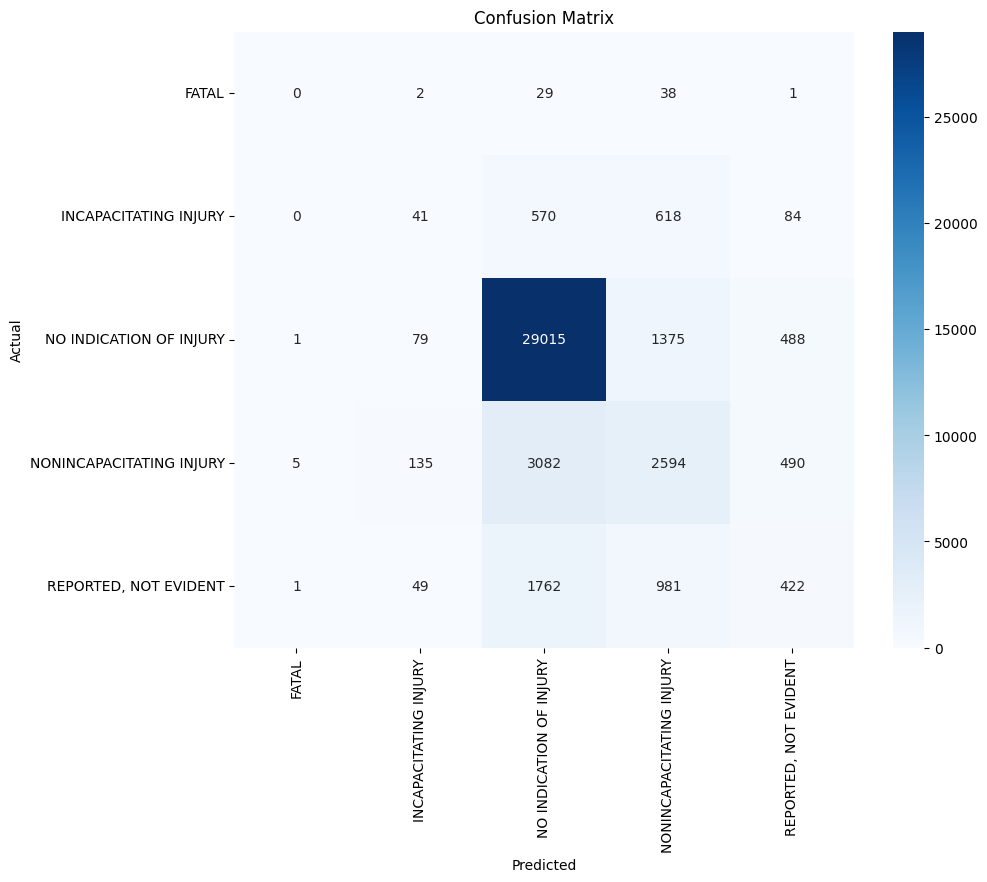

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

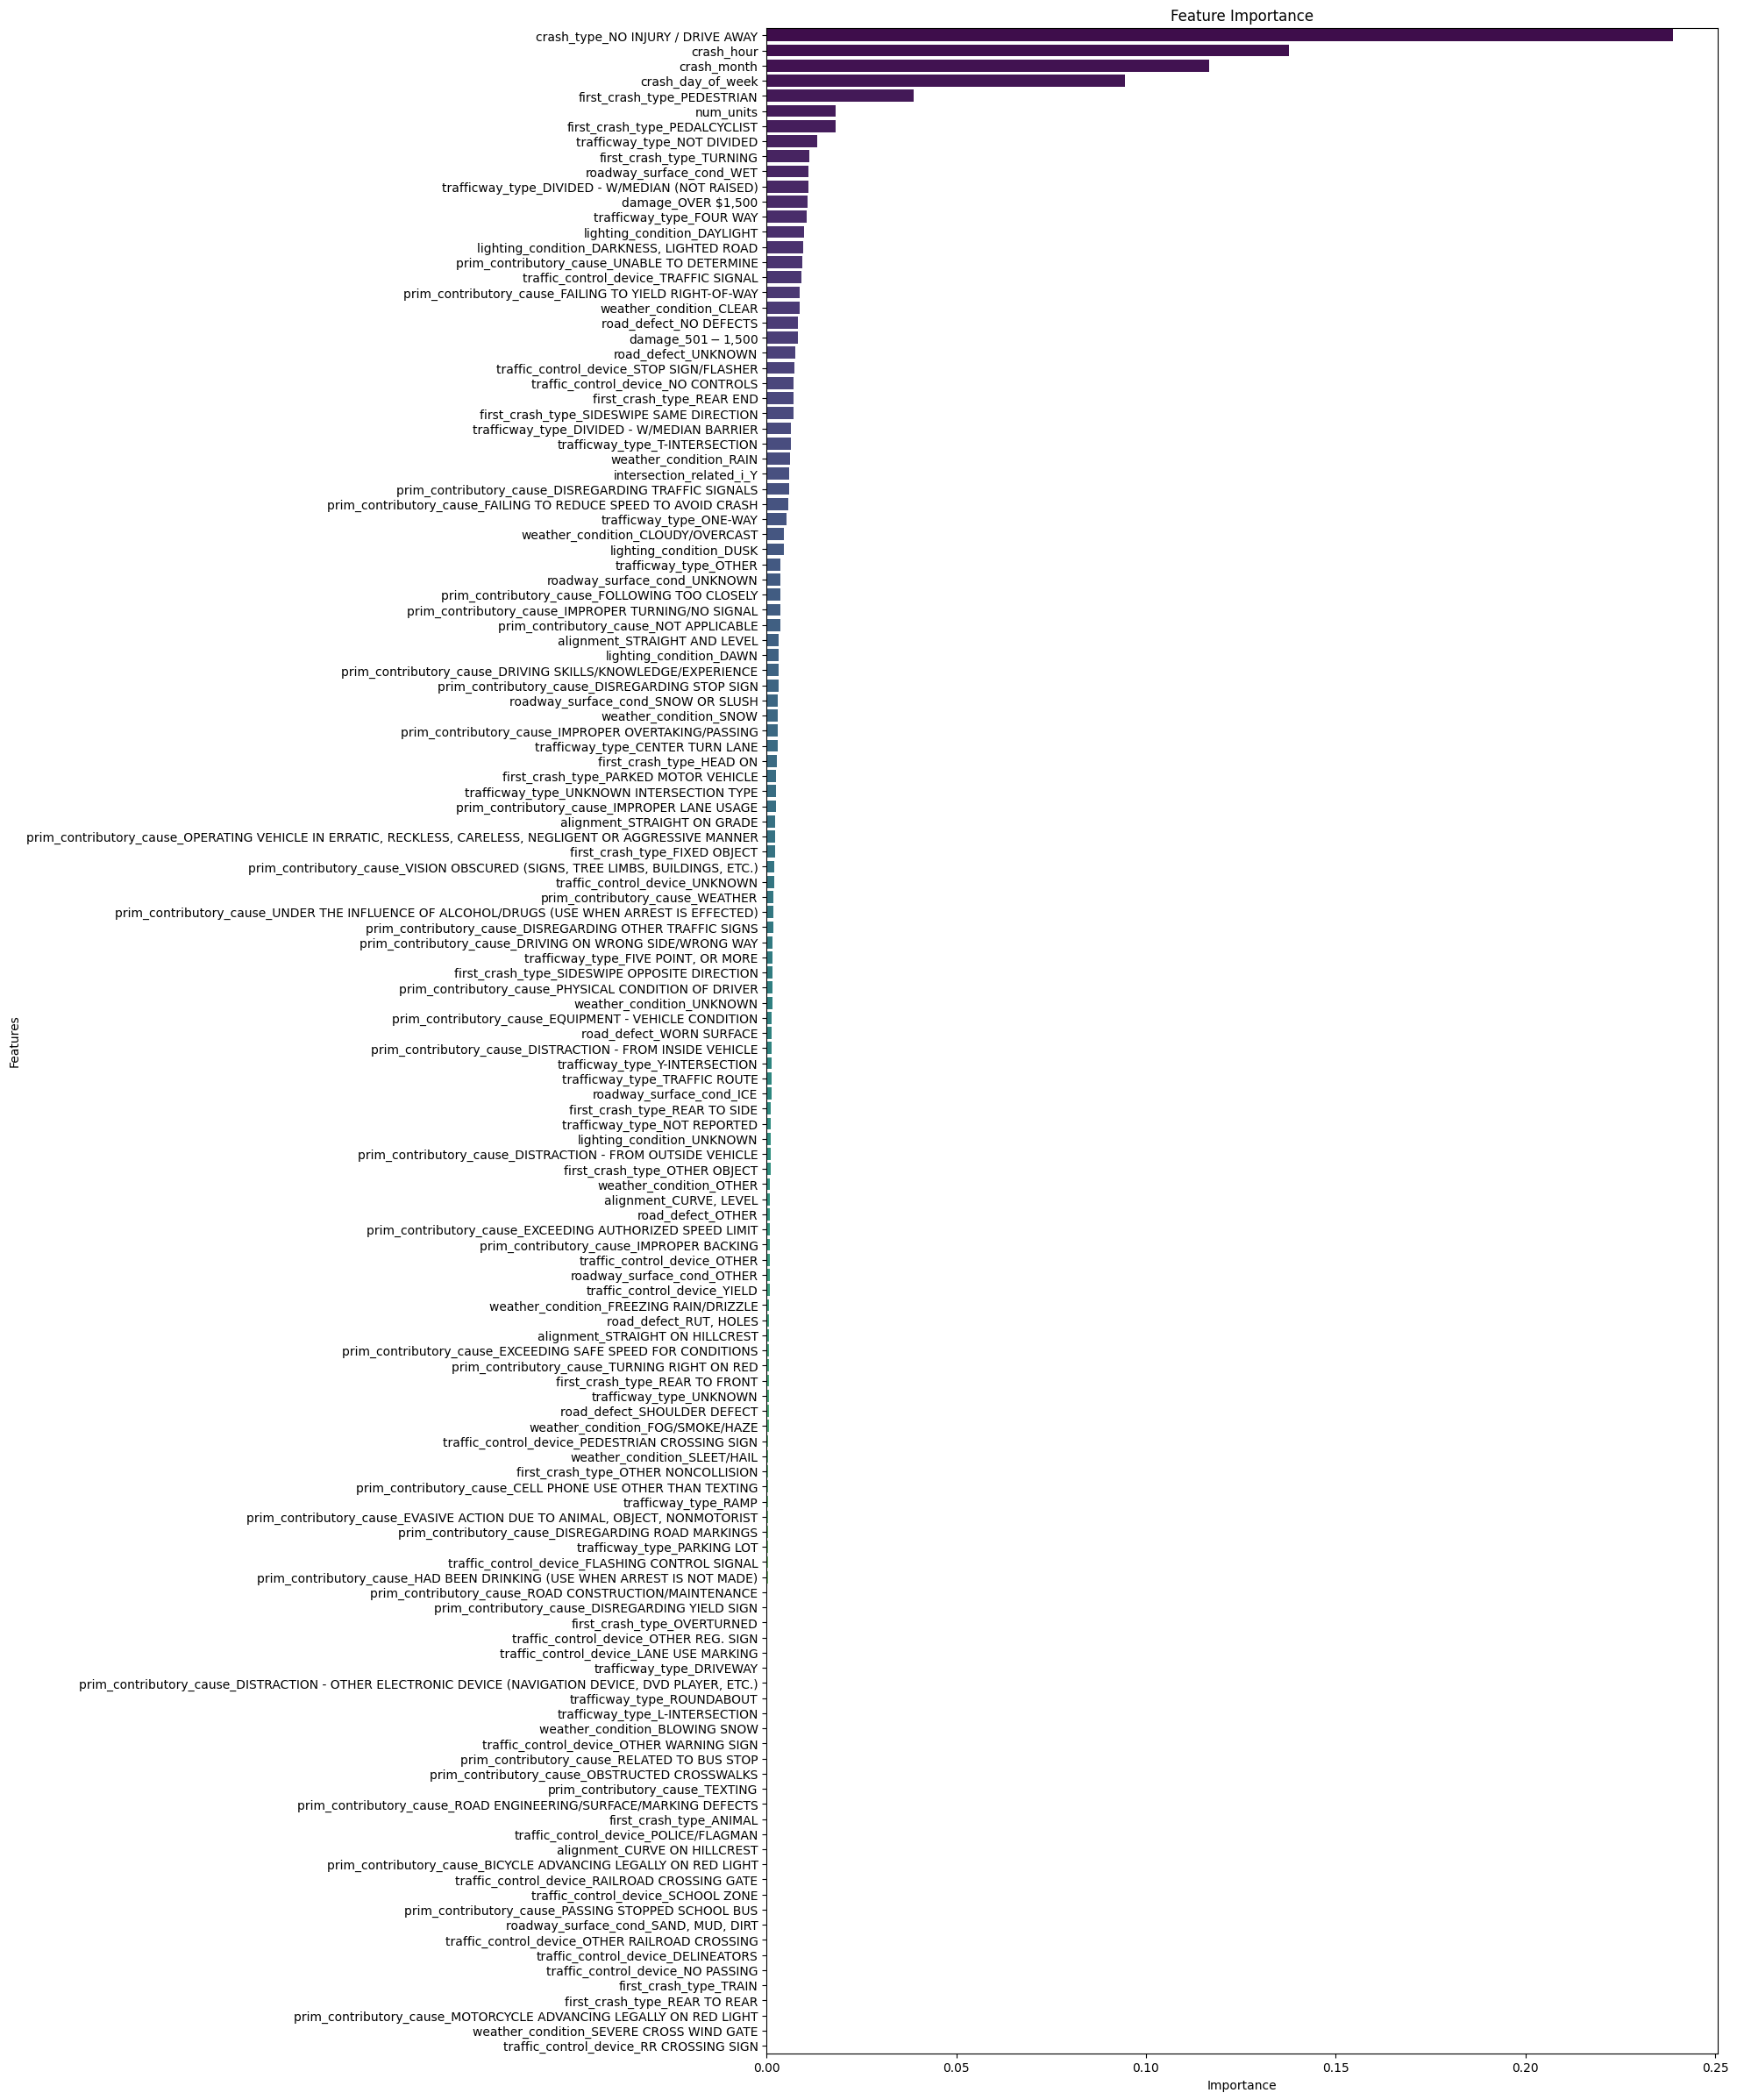

In [36]:
# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(14, 30))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [37]:
from xgboost import XGBClassifier

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))


XGBoost Classification Report:

                          precision    recall  f1-score   support

                   FATAL       0.25      0.01      0.03        70
   INCAPACITATING INJURY       0.09      0.00      0.00      1313
 NO INDICATION OF INJURY       0.81      0.98      0.89     30958
NONINCAPACITATING INJURY       0.56      0.34      0.42      6306
   REPORTED, NOT EVIDENT       0.45      0.11      0.18      3215

                accuracy                           0.78     41862
               macro avg       0.43      0.29      0.30     41862
            weighted avg       0.72      0.78      0.73     41862

